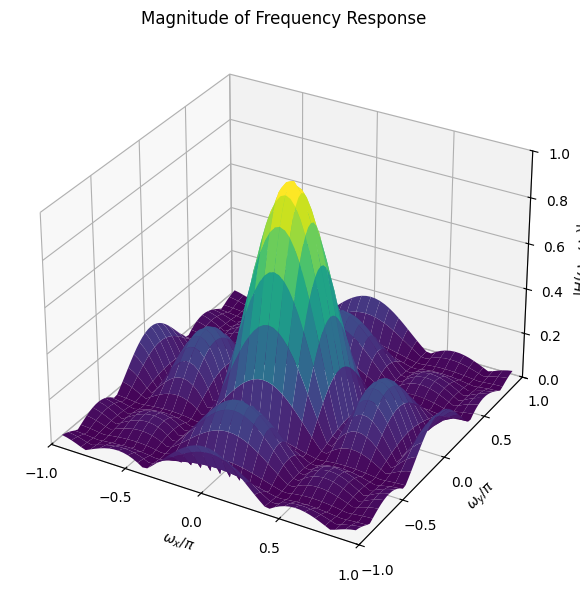

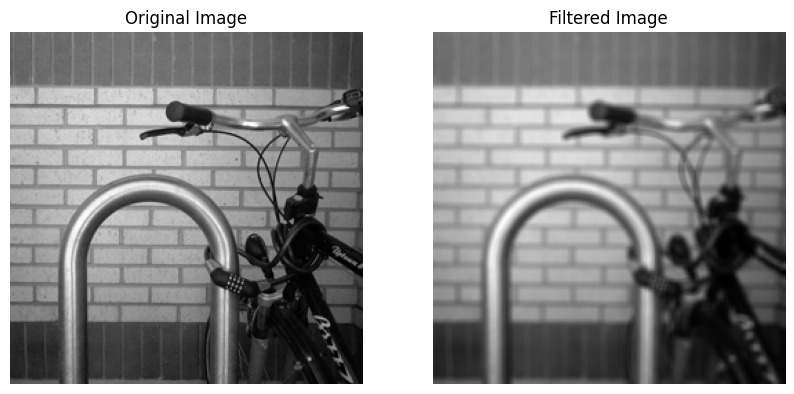

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

# === Pilih tipe filter ===
type_filter = '2d'
# type_filter = '1d_horizontal'
# type_filter = '1d_vertical'

# === Construct grid of (omega_x, omega_y) ===
wx, wy = np.meshgrid(np.arange(-3, 3.1, 0.1), np.arange(-3, 3.1, 0.1))

# === Compute frequency response ===
if type_filter == '2d':
    H = (1 / 25) * (1 + 2 * np.cos(wx) + 2 * np.cos(2 * wx)) * (1 + 2 * np.cos(wy) + 2 * np.cos(2 * wy))
    h = np.ones((5, 5)) / 25
elif type_filter == '1d_horizontal':
    H = (1 + 2 * np.cos(wx) + 2 * np.cos(2 * wx)) / 5
    h = np.ones((1, 5)) / 5
elif type_filter == '1d_vertical':
    H = (1 + 2 * np.cos(wy) + 2 * np.cos(2 * wy)) / 5
    h = np.ones((5, 1)) / 5

# === Plot magnitude of frequency response ===
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(wx / np.pi, wy / np.pi, np.abs(H), cmap='viridis')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1])
ax.set_xticks(np.arange(-1, 1.1, 0.5))
ax.set_yticks(np.arange(-1, 1.1, 0.5))
ax.set_xlabel(r'$\omega_x / \pi$')
ax.set_ylabel(r'$\omega_y / \pi$')
ax.set_zlabel(r'$|H(\omega_x, \omega_y)|$')
plt.title('Magnitude of Frequency Response')
plt.tight_layout()
plt.show()

# === Apply filter to test image ===
img = np.array(Image.open('croppedBike.png').convert('L'), dtype=float) / 255.0
imgFilt = cv2.filter2D(img, -1, h, borderType=cv2.BORDER_REFLECT)

# === Show results ===
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(imgFilt, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')

plt.show()
